# Statistical Inference

Statistical inference refers to mathematically rigorous techniques to draw conclusions from data.  A typical question is, "Does doing something have an effect?"  In ballistics the *something* might be *using a different type of ammunition*, and the *effect* of interest might be *change the precision of the gun*.  For example, "Is ammunition A more precise than ammunition B?"

The simple answer to a question like that is, "Test some of each and find out."  But the "find out" part of that process is tricky: People are notoriously prone to drawing unjustified conclusions from data.  Statistical inference is the science of what the data can truly say.

We're going to focus on doing statistical inference for simple A-B tests, in contexts where we know the probability distributions that apply to the question we're studying.  In ballistics, the distribution that applies to one-dimensional variables like muzzle velocity and shot dispersion along any one axis is the Normal distribution.  Point of impact on a two-dimensional target follows an uncorrelated bivariate Normal distribution, which in most relevant scenarios reduces to the Rayleigh distribution (which is the square root of the Exponential distribution).  So here are the steps we will follow for every A-B question:


1. **Articulate a *null hypothesis* $H_0$**, which is that there is no difference between A and B.  This creates an alternate hypothesis $H_1 = H_0'$ (i.e., the alternate is the complement of the null hypothesis), which is that there *is* a difference between A and B.
1. **Run an *experiment*** to collect *sample data* that can address the hypothesis.  If the question is about the precision of A vs B, then the experiment will be to shoot some amount of A and B, and the data will be the dispersion of each shot on a target.
1. **Construct a *test statistic***.  A test statistic is a number computed from sample data whose value should depend on whether a hypothesis is true.
    * For *location* parameters like the Normal mean ($\mu$) the best test statistic is the difference of estimates: ($\hat{\mu}_A - \hat{\mu}_B$)
    * For *scale* parameters like the Normal SD ($\sigma$) the best test statistic is a ratio of the estimates: $\frac{\hat{\sigma}_A}{\hat{\sigma}_B}$
1. **Analyze the statistic** using the following standard inferential tools:
    * The ***p* value**, which is the probability of observing those data if the null hypothesis is correct.  Expressed another way: ***p*** *is the probability that whatever difference was found in the experiment was due to chance instead of to a real difference*.  (This is also referred to as the probability of a "type 1 error" or "false positive.")
    * The **effect size**, which is an estimate of the difference between A and B *if the alternate hypothesis is correct*.  For example, if $\frac{\hat{\sigma}_A}{\hat{\sigma}_B} = 2$ then we would say that *if we believe $H_1$* then we estimate that A has double the dispersion of B.
    * **Confidence Interval (CI) on the effect size**, which is a range around the estimated effect size that contains the true value in some proportion of experiments.  For example, if A really does have exactly 2 times the dispersion of B, and following each experiment we calculate the 90% confidence interval on the measured effect size, then in 90% of such experiments the computed confidence interval will contain the value 2.

It is important to note that statistical inference can never definitively tell us which hypothesis is correct.  It merely summarizes the weight of the evidence under each hypothesis.  What conclusion to draw or action to take is still a matter of individual preferences.  For example, if the cost of A and B are about the same then a shooter may decide to switch from A to B even if the *p* value is very high, because there is virtually no downside if the inferred benefit is a false positive.  On the other hand, if the cost of B is much higher than A, then a shooter might look for a very low *p* value and a tight confidence interval on a large effect before deciding to make the switch.

----

**Clarification on meaning of *hypothesis***

The **null hypothesis** $(H_0)$ is the default assertion that two random variables are the same (meaning that they have identical distributions).  Why do we frame statistical questions this way?  This is perhaps an artifact of how the science developed.  But here's the fundamental problem:  Samples of random variables always exhibit statistical differences even when there is no actual difference (i.e., even when $H_0$ is true).  So the challenge in statistical inference is to distinguish between experimental differences that appear when there is no true difference – i.e., random sample variation under $H_0$ – and differences that appear when there is a true difference (i.e., when $H_1$ is true).

So when we set out to identify true differences, one of the questions we need to consider is, "*What is the likelihood of observing these data if there is no true difference?*"  The answer to this is provided by the *p* value: the probability of observing data with differences at least as great as that seen in an experiment if $H_0$ is true (i.e., there is no true difference).

Until a few decades ago, many researchers ended their analysis with the *p* value.  But that can produce a variety of adverse and misleading results.  (Search the terms *p-hacking* and *data-dredging* for a taste.)  So statisticians have tried to increase the attention given to effect sizes and Confidence Intervals, as we do here.

# Sampling distribution for CI and *p*

Confidence intervals and *p* values are related: The information needed to find confidence intervals is also sufficient to find *p* values.

In many cases, given a common distribution (e.g., Normal or Exponential), we can find formulas to compute confidence intervals and *p*.

Even when we don't have a formula, if we have a model of the random variable in question then we can always use Monte Carlo simulation to generate a *sampling distribution* of an experiment, and we can get CIs and *p* values from the sampling distribution.  To do so we run simulations of the experiment under the null hypothesis, meaning that we generate random samples for each independent variable using the same model/distribution.  This will be easy to understand by looking at the "Simulation to verify" subsections in each of the topics that follow here.

Note that for small sample sizes (which typically means *n* well under 100) the CI and *p* values usually depend heavily on the number samples being collected in each experiment.  Therefore, a sampling distribution compiled for one value of *n* will probably not be valid for experiments that use a different value of *n*.

# Ratio of Variances, Normally distributed variables

In the following example, I want to test whether the variance of two normally distributed variables is different.  Variance is a scale parameter so my test statistic will be the ratio of the variance estimates.  I happen to know that if *X* and *Y* are normally distributed, then the test statistic for a difference in variance under the null hypothesis is
$$\frac{s_x^2}{s_y^2} \sim F(n_x-1, n_y-1)$$

## Check of Sampling Distribution
So after I generate the sampling distribution I will compare it to that F distribution and expect it to be practically identical.  (Comparison is by Q-Q plot, and the distributions are identical if and only if the plotted points all sit on the line y=x.)

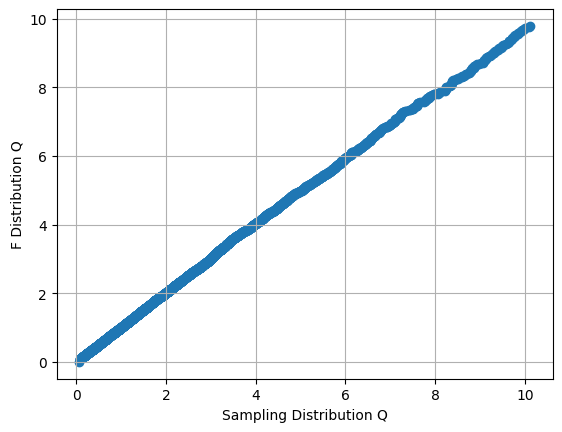

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import f

nx, ny = (15, 5)  # Experimental parameters – sample size for each variable

nsim = 10_000  # Number of experiments to simulate to generate sampling distribution
R = np.zeros(nsim)  # Sample ratio
for i in range(nsim):
    # Simulated experiment under H0:
    x = np.random.normal(size=nx)  # Default scale parameter is 1, which is fine:
    y = np.random.normal(size=ny)  # We just need it to be the same for both variables
    varX = np.var(x, ddof=1)
    varY = np.var(y, ddof=1)
    R[i] = varX/varY  # The test statistic
R.sort()  # Now sorted, R is the sampling distribution of the test statistic
# Prepare Q-Q plot to compare sampling distribution with another distribution
r = np.linspace(0, 1, nsim, endpoint=False)  # Quantiles to pull from second distribution
Q = f.ppf(r, nx-1, ny-1)  # Distribution to compare in Q-Q plot
cut_tail = int(0.98 * nsim)  # Cut off the extreme right tail where the samples are too random
plt.scatter(R[:cut_tail], Q[:cut_tail])
plt.xlabel('Sampling Distribution Q')
plt.ylabel('F Distribution Q')
plt.grid(True)
plt.show()

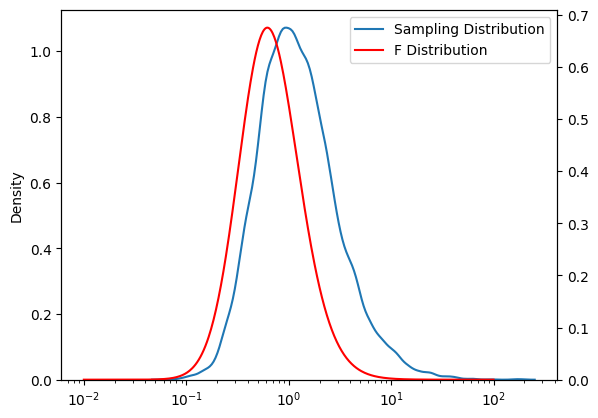

In [198]:
# Another view: kernel density estimate of sampling distribution
import seaborn as sns
fig, ax = plt.subplots()
sns.kdeplot(R, log_scale=True, bw_adjust=.75, ax=ax, label='Sampling Distribution')
ax2 = ax.twinx()
x = np.logspace(-2,2,500)
ax2.plot(x, f.pdf(x, nx, ny), label='F Distribution', color='r')
ax2.set_ybound(lower=0)
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)
plt.show()

So that confirms that the sampling distribution is very close to the formulaic distribution.  They won't match exactly because the sampling distribution is based on only `nsim` points, so it's a discrete approximation.  The mismatch will be more extreme in the tails where Monte Carlo generates fewer samples.

Now I'll show how to use either one of the distributions to calculate the *p* value and confidence interval.

## CI and *p* for one experiment

The formula for the Confidence Interval on a ratio of sample variances, for normally distributed variables, is:

$$\frac{s_x^2}{s_y^2} \ \times \left[ \frac{1}{F_{\frac{1+\gamma}{2}}(n_x-1, n_y-1)}, \frac{1}{F_{\frac{1-\gamma}{2}}(n_x-1, n_y-1)} \right]$$

In [30]:
from scipy.stats import percentileofscore

true_param = 1  # Simulation setting: True value of VarX/VarY
gamma = 0.9  # Confidence Interval setting: desired coverage

# Run Experiment
x = np.random.normal(size=nx, scale=np.sqrt(true_param))
y = np.random.normal(size=ny)
varX = np.var(x, ddof=1)
varY = np.var(y, ddof=1)
ratio = varX/varY

# Right tail of p value
p_right_from_sampling_distribution = 1-percentileofscore(R, ratio if ratio >= 1 else 1/ratio)/100
p_right_from_F_distribution = 1-f.cdf(ratio if ratio >= 1 else 1/ratio, nx-1, ny-1)
# Left tail of p value
p_left_from_sampling_distribution = percentileofscore(R, ratio if ratio <= 1 else 1/ratio)/100
p_left_from_F_distribution = f.cdf(ratio if ratio <= 1 else 1/ratio, nx-1, ny-1)

# Coarse approach to two-tailed p values
p_from_sampling_distribution = percentileofscore(R, ratio)/100
p_from_F_distribution = f.cdf(ratio, nx-1, ny-1)
# Make these 2-tailed p values
p_from_sampling_distribution = 2*min(p_from_sampling_distribution, 1-p_from_sampling_distribution)
p_from_F_distribution = 2*min(p_from_F_distribution, 1-p_from_F_distribution)

# Compute confidence interval using F-distribution
CU = ratio / f.ppf((1-gamma)/2, nx-1, ny-1)   # Upper bound of confidence interval
CL = ratio / f.ppf(1-(1-gamma)/2, nx-1, ny-1) # Lower bound of confidence interval
# Compute confidence interval using sampling distribution
CUs = ratio / R[int(nsim * (1-gamma)/2)]      # Upper bound of confidence interval
CLs = ratio / R[int(nsim * (1-(1-gamma)/2))]  # Lower bound of confidence interval

print(f'Samples VarianceX: {varX:.2f} (n={nx})\t VarianceY: {varY:.2f} (n={ny})\n'
      f'\tSample Variance Ratio: {varX/varY:.2f}\tTrue Ratio: {true_param}\n'
      f'{gamma:.0%} Confidence Interval on Sample Ratio: [{CL:.2f}, {CU:.2f}] from F-dist\n'
      f'\t\t ... Confidence Interval [{CLs:.2f}, {CUs:.2f}] from sampling distribution\n'
      f'p left tail = {p_left_from_sampling_distribution:.1%}, right tail = {p_right_from_sampling_distribution:.1%}, sum={p_right_from_sampling_distribution+p_left_from_sampling_distribution:.1%}; coarse 2-tail={p_from_sampling_distribution:.1%} from sampling dist\n'
      f'p left tail = {p_left_from_F_distribution:.1%}, right tail = {p_right_from_F_distribution:.1%}, sum={p_right_from_F_distribution+p_left_from_F_distribution:.1%}; coarse 2-tail={p_from_F_distribution:.1%} from F-dist'
      )

Samples VarianceX: 0.70 (n=15)	 VarianceY: 1.91 (n=5)
	Sample Variance Ratio: 0.37	True Ratio: 1
90% Confidence Interval on Sample Ratio: [0.06, 1.14] from F-dist
		 ... Confidence Interval [0.06, 1.13] from sampling distribution
p left tail = 6.9%, right tail = 17.1%, sum=24.0%; coarse 2-tail=13.8% from sampling dist
p left tail = 7.1%, right tail = 17.1%, sum=24.2%; coarse 2-tail=14.3% from F-dist


### Simulation to verify *p*

Here's how we can check a *p* values: Simulate the experiment under the null hypothesis.  Remember: the null hypothesis is that *X* and *Y* have the same distribution.  The experiment is to draw $n_x$ samples from *X* and $n_y$ samples from *Y* and then compute the test statistic (the ratio of their sample variances).  Now **count how many of these simulations give a test statistic that is at least as extreme as the one for which we computed the *p* value above.  That proportion should exactly match *p*.**

In this case we've broken out the two tails of the distribution so we can check *p* on both the left and right tails.  (For small sample sizes, the tails will be quite asymmetric when $n_x$ is different from $n_y$.)  Since the statistic in question is a ratio, the left tail are values where the numerator is smaller than the denominator, and the right tail are values where the numerator is larger than the denominator.  We have constructed our *p* values to be agnostic to which variance is in the numerator: So if one variance is twice as large as the other, then the ratio could be either 2/1 or 1/2, and if it's the former than "more extreme" means greater than 2, and if it's the latter than "more extreme" means less than 1/2.  To handle both tails we will check both the ratio and its inverse.

In [161]:
print(f'p values calculated for reference variance ratio {ratio:.2f} and its inverse {1/ratio:.2f}:')
print(f'\tF-dist gives p left tail = {p_left_from_F_distribution:.1%}, right tail = {p_right_from_F_distribution:.1%}, sum={p_right_from_F_distribution+p_left_from_F_distribution:.1%}')
sample_ratio = ratio  # Ratio from single experiment above
if sample_ratio < 1:  # Reference value will be the ratio in terms > 1
    sample_ratio = 1/sample_ratio
count_left = 0
count_right = 0
for i in range(nsim):
    x = np.random.normal(size=nx)  # We're using the same parameters for both variables
    y = np.random.normal(size=ny)  # since this is a simulation under the null hypothesis
    simVarX = np.var(x, ddof=1)
    simVarY = np.var(y, ddof=1)
    simRatio = simVarX/simVarY
    if simRatio > 1 and simRatio >= sample_ratio:
        count_right += 1
    elif simRatio < 1 and simRatio <= 1/sample_ratio:
        count_left += 1
print(f'Over {nsim:,} simulations with (nx={nx}, ny={ny}) using the null hypothesis:\n'
      f'\t{count_left/nsim:.1%} produced a variance ratio < {1/sample_ratio:.2f}\n'
      f'\t{count_right/nsim:.1%} produced a variance ratio > {sample_ratio:.2f}\n'
      f'\t{(count_left+count_right)/nsim:.1%} produced a variance ratio more extreme than the reference.'
      )

p values calculated for reference variance ratio 0.32 and its inverse 3.15:
	F-dist gives p left tail = 4.8%, right tail = 13.8%, sum=18.6%
Over 10,000 simulations with (nx=15, ny=5) using the null hypothesis:
	4.5% produced a variance ratio < 0.32
	13.8% produced a variance ratio > 3.15
	18.3% produced a variance ratio more extreme than the reference.


## Simulation to verify CI formula
We can use simulations to verify our Confidence Interval (CI) formula.  Remember: the definition of the Confidence Interval is *the range that contains the true parameter in exactly $\gamma$ (gamma) proportion of the experiments*.  So we just **simulate many experiments and count the proportion in which the calculated CI contains the true parameter**.  (Because they are simulations, we know the true parameter because we are providing it to the random number generator.)

As in all probabilistic simulation methods: the greater the number of simulations, the closer our observed value (the proportion containing the true parameter) should come to the theoretical value ($\gamma$).

In [54]:
# Simulation to verify confidence interval on ratio of estimated variance
import numpy as np
from scipy.stats import f

nx, ny = (12, 4)
nsim = 20_000
true_param = 5  # True parameter VarX/VarY
gamma = 0.9  # Desired confidence interval coverage
FU = 1/f.ppf((1-gamma)/2, nx-1, ny-1)   # Lower bound of F dist
FL = 1/f.ppf(1-(1-gamma)/2, nx-1, ny-1) # Upper bound of F dist
ratio = np.zeros(nsim)  # Sample ratio
count_contains_true = 0  # Number of simulations in which CI contains true parameter
for i in range(nsim):
    x = np.random.normal(size=nx, scale=np.sqrt(true_param))
    y = np.random.normal(size=ny)
    varX = np.var(x, ddof=1)
    varY = np.var(y, ddof=1)
    ratio[i] = varX/varY
    CL = ratio[i] * FL  # Confidence interval lower bound 
    CU = ratio[i] * FU  # Confidence interval upper bound
    if CL < true_param < CU:
        count_contains_true += 1

print(f'Over {nsim:,} simulations in which we drew {nx} samples for X and {ny} samples for Y,\n'
    #   f'\twhere the variance of X was {true_param} times that of Y,\n'
    #   f'\tMean ratio of sample variance was {np.mean(ratio):.4f}\n'
      f'\tand the {gamma:.0%} confidence interval contained the true parameter {count_contains_true / nsim:.1%} of the time.')

Over 20,000 simulations in which we drew 12 samples for X and 4 samples for Y,
	where the variance of X was 5 times that of Y,
	Mean ratio of sample variance was 14.5377
	and the 90% confidence interval contained the true parameter 90.2% of the time.


# Difference of Means, normally distributed variables

Recall that the confidence interval for the estimated mean $\hat{\mu_x}$ of a normally distributed variable X is:
$$\bar{X} \pm t_{\frac{1-\gamma}{2},n-1} \ \sqrt{\frac{s^2}{n}}$$

We often want to know to what extent the mean of two variables differ.  If $X, Y$ are normally distributed, the general case assumes that they may not have the same variance, and the confidence interval on the estimate of their difference $\hat{\mu_x} - \hat{\mu_y}$ comes from the Welch t-interval:

$(\bar{X} - \bar{Y}) \pm t_{\frac{1-\gamma}{2},\nu} \ \sqrt{\epsilon_x+\epsilon_y}, \ \ $ where: $\nu=\frac{(\epsilon_x + \epsilon_y)^2}{\frac{\epsilon_x^2}{n_x-1}+\frac{\epsilon_y^2}{n_y-1}}, \ \ \ \epsilon_i = \frac{s_i^2}{n_i}$

And we can get the p-value under the null hypothesis ($\mu_x = \mu_y$) from the following test statistic (which is t-distributed with $\nu$ degrees of freedom):

$$\frac{\bar{X} - \bar{Y}}{\sqrt{\epsilon_x+\epsilon_y}} \sim t(\nu)$$

### If variances are the same
We can get tighter confidence intervals if we know that the variance of X and Y are the same (because we are estimating just one "pooled sample variance" instead of splitting the samples to make two different variance estimates), in which case we can use Student's formulation:
$(\bar{X} - \bar{Y}) \pm t_{\frac{1-\gamma}{2},n+m-2} \left(S_p \sqrt{\frac{1}{n_x}+\frac{1}{n_y}}\right), \ \ $ where: $S_p^2 = \frac{(n-1)s_x^2+(m-1)s_y^2}{n+m-2}$ 

**However:** If this equal-variance assertion is incorrect then the inference will be invalid.  [We should use Welch’s t-test by default, instead of Student’s t-test, because Welch's t-test performs better than Student's t-test whenever sample sizes and variances are unequal between groups, and gives the same result when sample sizes and variances are equal.](https://daniellakens.blogspot.com/2015/01/always-use-welchs-t-test-instead-of.html)


## CI and p for one experiment
Note that [the Welch statistic is only *approximately* t-distributed](https://stats.stackexchange.com/a/571607/34792), so we will not always find the CI and p converging exactly as we do in the other scenarios covered here.  But even with small samples it's very close – widely accepted as close enough for practice.

In [128]:
import numpy as np
from scipy.stats import t
gamma = 0.9  # Desired confidence interval coverage

# Experiment parameters
nX, nY = (12, 4)        # Sample size for each variable
meanX, meanY = (0, .6)  # True mean values
sigmaX, sigmaY = (1, 2) # True standard deviations

# One experiment:
x = np.random.normal(size=nX, loc=meanX, scale=sigmaX)
y = np.random.normal(size=nY, loc=meanY, scale=sigmaY)
muX = np.mean(x)          # Sample mean of X
muY = np.mean(y)          # Sample mean of Y
varX = np.var(x, ddof=1)  # Sample variance of X
varY = np.var(y, ddof=1)  # Sample variance of Y
eX = varX / nX
eY = varY / nY
nu = (eX + eY)**2 / (eX**2 / (nX-1) + eY**2 / (nY-1))  # Welch's t parameter
sampleDiff = (muX - muY)
tstat = sampleDiff / np.sqrt(eX+eY)
p = 2*t.cdf(-abs(tstat), df=nu)  # 2-tailed p value
CI = t.interval(gamma, df=nu, loc=sampleDiff, scale=np.sqrt(eX+eY))

print(f'Samples MeanX: {muX:.2f} (n={nX})\t MeanY: {muY:.2f} (n={nY})\n'
      f'\tSample diff: {(muX-muY):.2f}\t p-value={p:.1%} from t-stat: {tstat:.3f}, df={nu:.2f}\n'
      f'{gamma:.0%} Confidence Interval on sample difference of means: [{CI[0]:.2f}, {CI[1]:.2f}]'
      )

Samples MeanX: -0.01 (n=12)	 MeanY: 0.27 (n=4)
	Sample diff: -0.28	 p-value=76.7% from t-stat: -0.316, df=4.43
90% Confidence Interval on sample difference of means: [-2.12, 1.56]


In [129]:
# SciPy calculations
from scipy import stats
print(stats.ttest_ind(x, y, equal_var=False))
print(stats.ttest_ind(x, y, equal_var=False).confidence_interval(gamma))

TtestResult(statistic=-0.3157459297413457, pvalue=0.7665133077806672, df=4.432032034550143)
ConfidenceInterval(low=-2.1240776769069516, high=1.5626753696548008)


### Simulation to verify p

In [131]:
nsim = 100_000  # Number of simulations to run
leftStat = tstat
if leftStat > 0: leftStat = -leftStat
count_left = 0
count_right = 0
for i in range(nsim):
    x = np.random.normal(size=nX)  # We're using the same parameters for both variables
    y = np.random.normal(size=nY)  # since this is a simulation under the null hypothesis
    simMeanX = np.mean(x)
    simMeanY = np.mean(y)
    simVarX = np.var(x, ddof=1)  # Sample variance of X
    simVarY = np.var(y, ddof=1)  # Sample variance of Y
    eX = simVarX / nX
    eY = simVarY / nY
    simStat = (simMeanX - simMeanY) / np.sqrt(eX+eY)
    if simStat > 0 and simStat >= -leftStat:
        count_right += 1
    elif simStat < 0 and simStat <= leftStat:
        count_left += 1
print(f'Over {nsim:,} simulations with (nx={nX}, ny={nY}) under the null hypothesis:\n'
      f'\t{count_left/nsim:6.1%} produced a test statistic < {leftStat:.2f}\n'
      f'\t{count_right/nsim:6.1%} produced a test statistic >  {-leftStat:.2f}\n'
      f'\t={(count_left+count_right)/nsim:.1%} produced a test stat more extreme than the reference.'
      )

Over 100,000 simulations with (nx=12, ny=4) under the null hypothesis:
	 38.3% produced a test statistic < -0.32
	 38.2% produced a test statistic >  0.32
	=76.5% produced a test stat more extreme than the reference.


## Simulation to verify CI formula

In [130]:
# Simulation to verify confidence interval on difference of estimated means
import math
import numpy as np
from scipy.stats import t

nX, nY = (12, 4)
meanX, meanY = (10, 9)
sigmaX, sigmaY = (1, 2)
nsim = 50_000
gamma = 0.9  # Desired confidence interval coverage

sampleDiff = np.zeros(nsim)
CIwidth = np.zeros(nsim)
count_contains_true = 0  # Number of simulations in which CI contains true difference meanX-meanY
CIequalVarWidth = np.zeros(nsim)  # CI with "homoscedastic" (equal variance) assumption
count_CIhomo_contains_true = 0  # Number of simulations in which homoscedastic CI contains true difference
for i in range(nsim):
    x = np.random.normal(size=nX, loc=meanX, scale=sigmaX)
    y = np.random.normal(size=nY, loc=meanY, scale=sigmaY)
    muX = np.mean(x)
    muY = np.mean(y)
    varX = np.var(x, ddof=1)
    varY = np.var(y, ddof=1)
    eX = varX / nX
    eY = varY / nY
    nu = (eX + eY)**2 / (eX**2 / (nX-1) + eY**2 / (nY-1))
    sampleDiff[i] = (muX - muY)
    CI = t.interval(gamma, df=nu, loc=sampleDiff[i], scale=np.sqrt(eX+eY))
    CIwidth[i] = CI[1] - CI[0]
    if CI[0] < meanX-meanY < CI[1]:
        count_contains_true += 1
    # Equal variance assumption:
    varP = ((nX-1)*varX + (nY-1)*varY)/(nX+nY-2)  # Pooled sample variance
    CIhomo = t.interval(gamma, df=(nX+nY-2), loc=sampleDiff[i], scale=np.sqrt(varP * (1/nX + 1/nY)))
    CIequalVarWidth[i] = CIhomo[1] - CIhomo[0]
    if CIhomo[0] < meanX-meanY < CIhomo[1]:
        count_CIhomo_contains_true += 1

print(f'Over {nsim:,} simulations in which we drew {nX} samples for X and {nY} samples for Y,\n'
      f'\t\twith sigmaX={sigmaX}, sigmaY={sigmaY} ... i.e., {"equal" if (sigmaX==sigmaY) else "**unequal**"} variances\n'
      f'\tAvg of difference of sample means (muX - muY) = {np.mean(sampleDiff):.2f} vs true value {(meanX-meanY)}\n'
      f'\tAvg CI width: {np.mean(CIwidth):.3f}; assuming equal variances={np.mean(CIequalVarWidth):.3f}\n'
      f'\tand the {gamma:.0%} confidence interval contained the true parameter:\n'
      f'\t\t{count_contains_true / nsim:.1%} of the time for general CI\n'
      f'\t\t{count_CIhomo_contains_true / nsim:.1%} of the time for equal variance CI\n'
      )

Over 50,000 simulations in which we drew 12 samples for X and 4 samples for Y,
		with sigmaX=1, sigmaY=2 ... i.e., **unequal** variances
	Avg of difference of sample means (muX - muY) = 1.00 vs true value 1
	Avg CI width: 4.276; assuming equal variances=2.538
	and the 90% confidence interval contained the true parameter:
		89.1% of the time for general CI
		75.9% of the time for equal variance CI



# Exponential Distribution

If *X* is exponentially distributed then the best estimate of the distribution's scale parameter $\hat{\beta_x}=\bar{x}$.  (Yes, just the mean value of the samples from *X*.  Note that the exponential distribution is often commonly parameterized by an inverse "rate" parameter $\lambda = \frac{1}{\beta}$.)  The confidence interval for the estimate $\hat{\beta_x}$ is:
$$\left[ \frac{2n\bar{x}}{\chi^2_{\frac{1+\gamma}{2},2n}}, \frac{2n\bar{x}}{\chi^2_{\frac{1-\gamma}{2},2n}} \right]$$

The exponential scale parameter is a variance, so what we see from here forward is going to look a lot like what we did earlier for variance of normally distributed variables.

## Ratio of Scale parameters

When we want to test for differences between two exponentially distributed random variables *X, Y*, the test statistic we use is the ratio of their estimates $(\frac{\bar{x}}{\bar{y}})$, and under the null hypothesis $\frac{\bar{x}}{\bar{y}} \sim F(2n_x, 2n_y)$.

The Confidence Interval on that test statistic is:
$$\frac{\bar{x}}{\bar{y}} \ \times \left[\frac{1}{F_{\frac{1+\gamma}{2}}(2n_x, 2n_y)}, \frac{1}{F_{\frac{1-\gamma}{2}}(2n_x, 2n_y)} \right]$$

### CI and p for one experiment

In [31]:
import numpy as np
from scipy.stats import f

nx, ny = (15, 5)  # Experimental parameters – sample size for each variable
true_param = 1  # Simulation setting: True value of BetaX/BetaY
gamma = 0.9  # Confidence Interval setting: desired coverage

# One experiment:
x = np.random.exponential(size=nx, scale=true_param)
y = np.random.exponential(size=ny)
mx = np.mean(x)
my = np.mean(y)
ratio = mx/my

# Right tail of p value
p_right = 1-f.cdf(ratio if ratio >= 1 else 1/ratio, 2*nx, 2*ny)
# Left tail of p value
p_left = f.cdf(ratio if ratio <= 1 else 1/ratio, 2*nx, 2*ny)

# Confidence interval
CU = ratio / f.ppf((1-gamma)/2, 2*nx, 2*ny)  # Upper bound of confidence interval
CL = ratio / f.ppf((1+gamma)/2, 2*nx, 2*ny)  # Lower bound of confidence interval

print(f'Samples MeanX: {np.mean(x):.2f} (n={nx})\t MeanY: {np.mean(y):.2f} (n={ny})\n'
      f'\tSample Ratio: {ratio:.2f}\t True Ratio: {true_param}\n'
      f'{gamma:.0%} Confidence Interval on Sample Ratio: [{CL:.2f}, {CU:.2f}] from F-dist\n'
      f'p left tail = {p_left:.1%}, right tail = {p_right:.1%}, sum={p_right+p_left:.1%}'
      )

Samples MeanX: 1.10 (n=15)	 MeanY: 0.68 (n=5)
	Sample Ratio: 1.62	 True Ratio: 1
90% Confidence Interval on Sample Ratio: [0.60, 3.50] from F-dist
p left tail = 15.0%, right tail = 21.4%, sum=36.4%


#### Simulation to verify p

In [32]:
nsim = 10_000  # Number of simulations to run
print(f'p values calculated for reference variance ratio {ratio:.2f} and its inverse {1/ratio:.2f}:')
print(f'\tF-dist gives p left tail = {p_left:.1%}, right tail = {p_right:.1%}, sum={p_right+p_left:.1%}')
sample_ratio = ratio  # Ratio from single experiment above
if sample_ratio < 1:  # Reference value will be the ratio in terms > 1
    sample_ratio = 1/sample_ratio
count_left = 0
count_right = 0
for i in range(nsim):
    x = np.random.exponential(size=nx)  # We're using the same parameters for both variables
    y = np.random.exponential(size=ny)  # since this is a simulation under the null hypothesis
    simMeanX = np.mean(x)
    simMeanY = np.mean(y)
    simRatio = simMeanX/simMeanY
    if simRatio > 1 and simRatio >= sample_ratio:
        count_right += 1
    elif simRatio < 1 and simRatio <= 1/sample_ratio:
        count_left += 1
print(f'Over {nsim:,} simulations with (nx={nx}, ny={ny}) using the null hypothesis:\n'
      f'\t{count_left/nsim:.1%} produced a ratio < {1/sample_ratio:.2f}\n'
      f'\t{count_right/nsim:.1%} produced a ratio > {sample_ratio:.2f}\n'
      f'\t{(count_left+count_right)/nsim:.1%} produced a variance ratio more extreme than the reference.'
      )

p values calculated for reference variance ratio 1.62 and its inverse 0.62:
	F-dist gives p left tail = 15.0%, right tail = 21.4%, sum=36.4%
Over 10,000 simulations with (nx=15, ny=5) using the null hypothesis:
	14.6% produced a ratio < 0.62
	21.4% produced a ratio > 1.62
	36.0% produced a variance ratio more extreme than the reference.


### Simulation to verify CI formula

In [59]:
# Simulation to verify confidence interval on ratio of scale parameter estimates
import numpy as np
from scipy.stats import f

nx, ny = (12, 4)
nsim = 50_000
true_param = 5  # Simulation setting: True value of BetaX/BetaY
gamma = 0.9  # Confidence Interval setting: desired coverage
FU = 1/f.ppf((1-gamma)/2, 2*nx, 2*ny)  # Lower bound of F dist
FL = 1/f.ppf((1+gamma)/2, 2*nx, 2*ny)  # Upper bound of F dist
ratio = np.zeros(nsim)  # Sample ratio
count_contains_true = 0  # Number of simulations in which CI contains true parameter
for i in range(nsim):
    x = np.random.exponential(size=nx, scale=true_param)
    y = np.random.exponential(size=ny)
    mx = np.mean(x)
    my = np.mean(y)
    ratio = mx/my
    CL = ratio * FL  # Confidence interval lower bound 
    CU = ratio * FU  # Confidence interval upper bound
    if CL < true_param < CU:
        count_contains_true += 1

print(f'Over {nsim:,} simulations in which we drew {nx} samples for X and {ny} samples for Y,\n'
      f'\tthe {gamma:.0%} confidence interval contained the true parameter {count_contains_true / nsim:.1%} of the time.')

Over 50,000 simulations in which we drew 12 samples for X and 4 samples for Y,
	the 90% confidence interval contained the true parameter 90.0% of the time.


# Rayleigh Distribution

The Rayleigh distribution is essentially the square root of the exponential distribution.  As we have already seen, the exponential parameter is a variance.  The Rayleigh parameter – appropriately labelled $\sigma$ – works like a standard deviation.  In fact, we use the same correction function $c_G$ to remove bias from its estimates as we apply to get unbiased estimates of standard deviation from normally distributed variables.

Given a sample {*r*} from a Rayleigh distributed random variable *R*, the best estimate of the Rayleigh parameter comes from the sum of squares:
$$s^2 = \!\,\frac{1}{2n}\sum{} r_i^2$$
and the unbiased estimate is:
$$\hat{\sigma} = c_G(2n+1) \sqrt{s^2}$$
where:
$$c_G(n) = \sqrt{\frac{n-1}{2}}\,\,\,\frac{\Gamma\left(\frac{n-1}{2}\right)}{\Gamma\left(\frac{n}{2}\right)}$$

If we are instead working from (*x, y*) coordinates that are i.i.d. and normally distributed, then $r_i = \sqrt{(x_i-\bar{x})^2 + (y_i-\bar{y})^2}$ is Rayleigh distributed but we give up two degrees of freedom calculating the mean of the two coordinates and correction for the unbiased estimate is $c_G(2n-1)$.

## Simulation to verify unbiased Rayleigh estimator


In [1]:
%load_ext cython

In [60]:
%%cython
import numpy as np
import math
from libc.math cimport sqrt
cimport cython
@cython.boundscheck(False)  # Doesn't check array bounds
@cython.cdivision(True)  # Doesn't spend time checking for zero divisors
def runSimRayleigh(int numShots, Py_ssize_t numSims, double sigma = 1.0):
    cdef double[:] sigmaEstimate = np.zeros(numSims, np.double)
    cdef double[:,:] r = np.random.rayleigh(scale=sigma, size=(numSims, numShots)).astype(np.double)

    cdef double d = 2*numShots+1
    cdef double cG = math.exp(math.lgamma((d-1)/2) - math.lgamma(d/2) - math.log(math.sqrt(2/(d-1))))
    cdef double xbar
    cdef Py_ssize_t i
    for s in range(numSims):
        xbar = 0
        for i in range(numShots):
            xbar += r[s, i]**2
        xbar /= numShots
        sigmaEstimate[s] = cG * sqrt(xbar/2)    # Unbiased Rayleigh parameter estimate
    return sigmaEstimate

In [62]:
testSigma = 2
n = 3
test = runSimRayleigh(n, 10_000_000, testSigma)
print(f'Simulating {n}-sample experiments with sigma={testSigma}: Mean estimate of sigma was {np.mean(test):.4f}')

Simulating 3-sample experiments with sigma=2: Mean estimate of sigma was 2.0000


### Simulation of Rayleigh from Bivariate Normal

When looking at a set shots on a sample target we don't know the true center of impact; we can only estimate its location as {$\bar{x}, \bar{y}$}, and in doing so we give up two degrees of freedom, which we also remove from the correction term.  In this case the estimate is:

$$\hat{\sigma} = c_G(2n-1) \sqrt{\frac{\sum{}(x_i-\bar{x})^2 + (y_i-\bar{y})^2}{2(n-1)}}$$

In [ ]:
%%cython
import numpy as np
import math
from libc.math cimport sqrt
cimport cython
@cython.boundscheck(False)  # Doesn't check array bounds
@cython.cdivision(True)  # Doesn't spend time checking for zero divisors
def runSimNormalBivariate(int numShots, Py_ssize_t numSims, double sigma = 1.0):
    cdef double[:] sigmaEstimate = np.zeros(numSims, np.double)
    cdef double[:,:,:] shots = np.random.normal(scale=sigma, size=(numSims, numShots, 2)).astype(np.double)

    cdef int degrees = 2*(numShots-1)  # Degrees of freedom (for estimators)
    cdef double d = 2*numShots-1
    cdef double cG = math.exp(math.lgamma((d-1)/2) - math.lgamma(d/2) - math.log(math.sqrt(2/(d-1))))
    cdef double sumR2                  # Sum of radii squared
    cdef double xbar, ybar
    cdef Py_ssize_t i, s
    for s in range(numSims):
        xbar = ybar = 0
        for i in range(numShots):
            xbar += shots[s, i, 0]
            ybar += shots[s, i, 1]
        xbar /= numShots
        ybar /= numShots
        sumR2 = 0
        for i in range(numShots):
            sumR2 += (shots[s, i, 0] - xbar)**2 + (shots[s, i, 1] - ybar)**2
        sigmaEstimate[s] = cG * sqrt(sumR2 / degrees)    # Unbiased Rayleigh parameter estimate
    return sigmaEstimate

In [33]:
groupSize = 3           # Number of shots per group
simulations = 10_000_000    # Number of groups to simulate
simulationSigma = 2.0   # Sigma to use when generating random shots

sigmaEstimate = runSimNormalBivariate(groupSize, simulations, sigma=simulationSigma)

print(f" *** Based on {simulations:,} simulated {groupSize}-shot groups with true sigma = {simulationSigma}: ***"
    f"\n\tMean estimate of sigma was {np.mean(sigmaEstimate):.4f}"
)

 *** Based on 10,000,000 simulated 3-shot groups with true sigma = 2.0: ***
	Mean estimate of sigma was 2.0004


## Ratio of Sigmas

If $X \sim \operatorname{Rayleigh}(\sigma)$ then $X^2 \sim \operatorname{Exponential}(\beta=\frac{\sigma^2}{2})$.  So when we want to test for differences between two Rayleigh distributed random variables $X, Y$, we will get the *p* and confidence interval by squaring each sample value and applying the *Ratio of Scale parameters* test for exponential random variables (shown and verified above):
$$\frac{\bar{x^2}}{\bar{y^2}} \sim F(2n_x, 2n_y)$$

Note that if we are starting with unbiased estimates $\hat{\sigma_x}, \hat{\sigma_y}$ then we also have to back out the bias correction terms on the other side.  I.e.,
$$\left (\frac{\hat{\sigma_x}}{\hat{\sigma_y}} \cdot \frac{c_{G_y}}{c_{G_x}} \right )^2 \sim F(2n_x, 2n_y)$$

and Confidence Interval is:
$$\frac{\hat{\sigma_x}}{\hat{\sigma_y}} \cdot \frac{c_{G_y}}{c_{G_x}} \ \times \left[\frac{1}{\sqrt{F_{\frac{1+\gamma}{2}}(2n_x, 2n_y)}}, \frac{1}{\sqrt{F_{\frac{1-\gamma}{2}}(2n_x, 2n_y)}} \right]$$

As with all Rayleigh estimates: If samples are derived from bivariate normal coordinates with unknown center than we have to remove 2 degrees of freedom and the confidence interval distribution is $F(2n_x-2, 2n_y-2)$.

(If sample sizes of X and Y are the same then the correction terms cancel and can be omitted; or if the sample sizes for both are large then the correction terms are negligible.)

### CI and p for one experiment

In [10]:
import numpy as np
import math
from scipy.stats import f

def cGauss(d: int) -> float:
    """Gaussian correction term with d degrees of freedom"""
    return math.exp(math.lgamma((d-1)/2) - math.lgamma(d/2) - math.log(math.sqrt(2/(d-1))))

nx, ny = (15, 5)  # Experimental parameters – sample size for each variable
true_param = 1.5  # Simulation setting: True value of SigmaX/SigmaY
gamma = 0.9  # Confidence Interval setting: desired coverage

# One experiment:
x = np.random.rayleigh(size=nx, scale=true_param)
y = np.random.rayleigh(size=ny)
mx = np.mean(np.square(x))
my = np.mean(np.square(y))
ratio = mx/my  # p from squared samples, so no bias term
# Right tail of p value
p_right = 1-f.cdf(ratio if ratio >= 1 else 1/ratio, 2*nx, 2*ny)
# Left tail of p value
p_left = f.cdf(ratio if ratio <= 1 else 1/ratio, 2*nx, 2*ny)

cGx = cGauss(2*nx-1)
cGy = cGauss(2*ny-1)
sigmaX = cGx * math.sqrt(mx/2)
sigmaY = cGy * math.sqrt(my/2)
sigmaRatio = sigmaX/sigmaY

# Confidence interval
CU = (cGy/cGx) * sigmaRatio * math.sqrt(1 / f.ppf((1-gamma)/2, 2*nx, 2*ny))  # Upper bound of confidence interval
CL = (cGy/cGx) * sigmaRatio * math.sqrt(1 / f.ppf((1+gamma)/2, 2*nx, 2*ny))  # Lower bound of confidence interval

print(f'Samples SigmaX: {sigmaX:.2f} (n={nx})\t SigmaY: {sigmaY:.2f} (n={ny})\n'
      f'\tRatio: {math.sqrt(sigmaRatio):.2f}\t True Ratio: {true_param}\n'
      f'{gamma:.0%} Confidence Interval on Sample Ratio: [{CL:.2f}, {CU:.2f}]\n'
      f'p left tail = {p_left:.1%}, right tail = {p_right:.1%}, sum={p_right+p_left:.1%}'
      )

Samples SigmaX: 1.75 (n=15)	 SigmaY: 1.24 (n=5)
	Ratio: 1.19	 True Ratio: 1.5
90% Confidence Interval on Sample Ratio: [0.88, 2.12]
p left tail = 6.1%, right tail = 11.3%, sum=17.4%


#### Simulation to verify p

In [11]:
nsim = 20_000  # Number of simulations to run
print(f'p values calculated for sigma^2 ratio {ratio:.2f} and its inverse {1/ratio:.2f}:')
print(f'\tF-dist gives p left tail = {p_left:.1%}, right tail = {p_right:.1%}, sum={p_right+p_left:.1%}')
sample_ratio = ratio  # Ratio from single experiment above
if sample_ratio < 1:  # Reference value will be the ratio in terms > 1
    sample_ratio = 1/sample_ratio
sample_sigmaRatio = (cGy/cGx) * sigmaRatio
if sample_sigmaRatio < 1:  # Reference value will be the ratio in terms > 1
    sample_sigmaRatio = 1/sample_sigmaRatio
count_left = 0
count_right = 0
count_leftSigma = 0
count_rightSigma = 0
for i in range(nsim):
    x = np.random.rayleigh(size=nx)  # We're using the same parameters for both variables
    y = np.random.rayleigh(size=ny)  # since this is a simulation under the null hypothesis
    simMeanX = np.mean(np.square(x))
    simMeanY = np.mean(np.square(y))
    simRatio = simMeanX/simMeanY
    if simRatio > 1 and simRatio >= sample_ratio:
        count_right += 1
    elif simRatio < 1 and simRatio <= 1/sample_ratio:
        count_left += 1

    simSigmaRatio = np.sqrt(simRatio)
    if simSigmaRatio > 1 and simSigmaRatio >= sample_sigmaRatio:
        count_rightSigma += 1
    elif simSigmaRatio < 1 and simSigmaRatio <= 1/sample_sigmaRatio:
        count_leftSigma += 1
print(f'Over {nsim:,} simulations with (nx={nx}, ny={ny}) using the null hypothesis:\n'
      f'\tObserved exceedance of X^2/Y^2: left = {count_left/nsim:.1%}, right = {count_right/nsim:.1%}, sum = {(count_left+count_right)/nsim:.1%}\n'
      f'\tObserved exceedance of SigmaX/SigmaY: left = {count_leftSigma/nsim:.1%}, right = {count_rightSigma/nsim:.1%}, sum = {(count_leftSigma+count_rightSigma)/nsim:.1%}\n'
      )

p values calculated for sigma^2 ratio 2.07 and its inverse 0.48:
	F-dist gives p left tail = 6.1%, right tail = 11.3%, sum=17.4%
Over 20,000 simulations with (nx=15, ny=5) using the null hypothesis:
	Observed exceedance of X^2/Y^2: left = 6.2%, right = 11.5%, sum = 17.8%
	Observed exceedance of SigmaX/SigmaY: left = 6.2%, right = 11.5%, sum = 17.8%



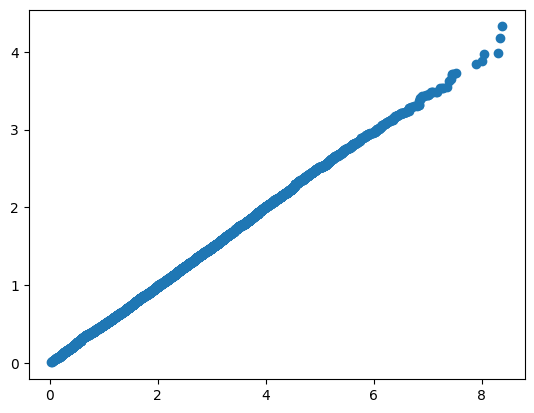

In [204]:
# Q-Q plot to check relationship between Rayleigh and Exponential
nsim = 10_000
sigma = 2
x = np.random.rayleigh(scale=sigma, size=nsim)
y = np.random.exponential(scale=sigma*sigma/2, size=nsim)
x.sort()
y.sort()
plt.scatter(x, np.sqrt(y))

### Simulation to verify CI formula

In [95]:
# Simulation to verify confidence interval on ratio of scale parameter estimates
#   in this case drawing directly from Rayleigh distribution.
import numpy as np
import math
from scipy.stats import f

def cGauss(d: int) -> float:
    return math.exp(math.lgamma((d-1)/2) - math.lgamma(d/2) - math.log(math.sqrt(2/(d-1))))

nx, ny = (12, 3)
nsim = 100_000
true_param = 5  # Simulation setting: True value of SigmaX/SigmaY
gamma = 0.9  # Confidence Interval setting: desired coverage

cGx = cGauss(2*nx+1)
cGy = cGauss(2*ny+1)
FU = math.sqrt(1/f.ppf((1-gamma)/2, 2*nx, 2*ny))  # Lower bound of F dist
FL = math.sqrt(1/f.ppf((1+gamma)/2, 2*nx, 2*ny))  # Upper bound of F dist
count_contains_true1 = 0  # Number of simulations in which CI contains true parameter
count_contains_true2 = 0  # Number of simulations in which CI contains true parameter
count_contains_true3 = 0  # Number of simulations in which CI contains true parameter
sigmaX = np.zeros(nsim)
sigmaY = np.zeros(nsim)
for i in range(nsim):
    x = np.random.rayleigh(size=nx, scale=true_param)
    y = np.random.rayleigh(size=ny)
    mx = np.mean(np.square(x))
    my = np.mean(np.square(y))
    ratio = mx/my
    # Confidence interval as function of ratio of squared samples:
    CL = np.sqrt(ratio) * FL  # Confidence interval lower bound 
    CU = np.sqrt(ratio) * FU  # Confidence interval upper bound
    if CL < true_param < CU:
        count_contains_true1 += 1
    # Confidence interval as function of estimated sigmas:
    sigmaX[i] = cGx * math.sqrt(mx/2)  # Unbiased sigma estimate
    sigmaY[i] = cGy * math.sqrt(my/2)  # Unbiased sigma estimate
    sigmaRatio = sigmaX[i]/sigmaY[i]
    CL = (cGy/cGx) * sigmaRatio * FL  # Confidence interval lower bound 
    CU = (cGy/cGx) * sigmaRatio * FU  # Confidence interval upper bound
    if CL < true_param < CU:
        count_contains_true2 += 1

print(f'Over {nsim:,} simulations in which we drew {nx} samples for X and {ny} samples for Y,\n'
      f'\tMean estimate of igmaX={np.mean(sigmaX):.4f}; mean estimate of sigmaY={np.mean(sigmaY):.4f}\n'
      f'\tthe {gamma:.0%} confidence interval contained the true parameter:\n'
      f'\t1. {count_contains_true1 / nsim:.1%} of the time (calculating from ratio of squared samples).\n'
      f'\t2. {count_contains_true2 / nsim:.1%} of the time (calculating from ratio of estimated sigmas).'
      )

Over 100,000 simulations in which we drew 12 samples for X and 3 samples for Y,
	Mean estimate of igmaX=5.0011; mean estimate of sigmaY=1.0011
	the 90% confidence interval contained the true parameter:
	1. 90.0% of the time (calculating from ratio of squared samples).
	2. 90.0% of the time (calculating from ratio of estimated sigmas).


#### Simulation for CI from Bivariate Normal

As mentioned earlier, when the Rayleigh samples are computed from coordinates that are i.i.d. normal, then we lose two degrees of freedom when calculating the mean coordinates of the two axes, and we have to adjust both the correction term $c_G$ and the F distribution accordingly.

In [ ]:
%%cython
import numpy as np
from libc.math cimport sqrt
cimport cython
@cython.boundscheck(False)  # Doesn't check array bounds
@cython.cdivision(True)  # Doesn't spend time checking for zero divisors
def sigmaEstimateFromBivariateNormal(sigma, n, cG):
    cdef double[:,:] samples = np.random.normal(scale=sigma, size=(n, 2))
    cdef int degrees = 2*(n-1)
    cdef double xbar, ybar, sumR2
    cdef Py_ssize_t i
    xbar = ybar = sumR2 = 0
    for i in range(n):
        xbar += samples[i, 0]
        ybar += samples[i, 1]
    xbar /= n
    ybar /= n
    for i in range(n):
        sumR2 += (samples[i, 0] - xbar)**2 + (samples[i, 1] - ybar)**2
    return sqrt(sumR2 / degrees)    # Biased Rayleigh parameter estimate

In [93]:
# Simulation to verify confidence interval on ratio of scale parameter estimates sA/sB
#   when samples are from bivariate normal with unknown center (losing 2 degrees of freedom)
import math
from scipy.stats import f

def cGauss(d: int) -> float:
    return math.exp(math.lgamma((d-1)/2) - math.lgamma(d/2) - math.log(math.sqrt(2/(d-1))))

nA, nB = (3, 12)
nsim = 500_000
true_param = 5  # Simulation setting: True value of SigmaA/SigmaB
gamma = 0.9     # Confidence Interval setting: desired coverage

cGa = cGauss(2*nA-1)
cGb = cGauss(2*nB-1)
FU = math.sqrt(1/f.ppf((1-gamma)/2, 2*nA-2, 2*nB-2))  # Lower bound of F dist
FL = math.sqrt(1/f.ppf((1+gamma)/2, 2*nA-2, 2*nB-2))  # Upper bound of F dist
count_contains_true = 0  # Number of simulations in which CI contains true parameter
sigmaA = np.zeros(nsim)
sigmaB = np.zeros(nsim)
sigmaRatio = np.zeros(nsim)
sigmaRatioRebias = np.zeros(nsim)
for i in range(nsim):
    sigmaA[i] = cGa * sigmaEstimateFromBivariateNormal(true_param, nA, cGa)  # Unbiased estimates
    sigmaB[i] = cGb * sigmaEstimateFromBivariateNormal(1, nB, cGb)           # Unbiased estimates
    sigmaRatio[i] = sigmaA[i]/sigmaB[i]
    # Confidence interval as function of estimated sigmas:
    sigmaRatioRebias[i] = (cGb/cGa) * sigmaRatio[i]
    CL = sigmaRatioRebias[i] * FL  # Confidence interval lower bound 
    CU = sigmaRatioRebias[i] * FU  # Confidence interval upper bound
    if CL < true_param < CU:
        count_contains_true += 1

print(f'Over {nsim:,} simulations in which we drew {nA} samples for A and {nB} samples for B,\n'
      f'\tMean sigmaA={np.mean(sigmaA):.4f}; mean sigmaB={np.mean(sigmaB):.4f}\n'
    #   f'\tMean sigmaA/sigmaB={np.mean(sigmaRatio):.4f}; Mean debiased sigmaA/sigmaB={np.mean(sigmaRatioRebias):.4f}\n'
      f'\tthe {gamma:.0%} confidence interval contained the true parameter {count_contains_true / nsim:.1%} of the time.\n'
)

Over 500,000 simulations in which we drew 3 samples for A and 12 samples for B,
	Mean sigmaA=5.0007; mean sigmaB=0.9997
	the 90% confidence interval contained the true parameter 90.0% of the time.

